<a href="https://colab.research.google.com/github/naveenkumarmarri/deeplearning/blob/master/GAN_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
df = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
img_dim = 784
gen_dim = 256
disc_dim = 256
noise_dim = 100

In [0]:
gen_inp = tf.placeholder(tf.float32, shape=[None, noise_dim])
disc_inp = tf.placeholder(tf.float32, shape=[None, img_dim])

In [0]:
batch_size = 128
num_steps = 80000
learning_rate = 1e-4
display_step = 20

In [0]:
def weight_init(shape):
  return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0]/2.))

In [0]:
W = {
    "w1":tf.Variable(weight_init([noise_dim, gen_dim])),
    "w2": tf.Variable(weight_init([gen_dim, img_dim])),
    "w3":tf.Variable(weight_init([img_dim, disc_dim])),
    "w4":tf.Variable(weight_init([disc_dim, 1]))
}
b = {
    "b1":tf.Variable(tf.zeros([gen_dim])),
    "b2":tf.Variable(tf.zeros([img_dim])),
    "b3":tf.Variable(tf.zeros([disc_dim])),
    "b4":tf.Variable(tf.zeros([1]))
    
}

In [0]:
def gen_fun(x):
  h1 = tf.matmul(x, W["w1"])
  h1 = tf.add(h1, b["b1"])
  h1 = tf.nn.relu(h1)
  
  h1 = tf.matmul(h1, W["w2"])
  h1 = tf.add(h1, b["b2"])
  h1 = tf.nn.sigmoid(h1)
  
  return h1

def disc_fun(x):
  h2 = tf.matmul(x, W["w3"])
  h2 = tf.add(h2, b["b3"])
  h2 = tf.nn.relu(h2)
  
  h2 = tf.matmul(h2, W["w4"])
  h2 = tf.add(h2, b["b4"])
  h2 = tf.nn.sigmoid(h2)
  
  return h2

In [0]:
gen_out=gen_fun(gen_inp)

disc_real_out=disc_fun(disc_inp)
disc_fake_out=disc_fun(gen_out)

optim_gen=tf.train.AdamOptimizer(learning_rate=learning_rate)

cost_gen=-tf.reduce_mean(tf.log(disc_fake_out))
cost_disc=-tf.reduce_mean(tf.log(disc_real_out)+tf.log(1.-disc_fake_out))

###Generator and Discriminator Variables
vars_gen = [W['w1'], W['w2'],b['b1'], b['b2']]
vars_disc = [W['w3'],W['w4'],b['b3'], b['b4']]


training_gen=optim_gen.minimize(cost_gen,var_list=vars_gen)
training_disc=optim_gen.minimize(cost_disc,var_list=vars_disc)

Step 1 Generator loss 0.594061, Discriminator loss 1.554304
Step 2000 Generator loss 2.118592, Discriminator loss 0.233232
Step 4000 Generator loss 2.837295, Discriminator loss 0.183951
Step 6000 Generator loss 3.028697, Discriminator loss 0.223940
Step 8000 Generator loss 3.146265, Discriminator loss 0.187740
Step 10000 Generator loss 3.043023, Discriminator loss 0.287633
Step 12000 Generator loss 2.987140, Discriminator loss 0.276108
Step 14000 Generator loss 2.690365, Discriminator loss 0.404969
Step 16000 Generator loss 2.703954, Discriminator loss 0.293026
Step 18000 Generator loss 2.345241, Discriminator loss 0.447893
Step 20000 Generator loss 2.868127, Discriminator loss 0.394090
Step 22000 Generator loss 2.642142, Discriminator loss 0.345108
Step 24000 Generator loss 2.899840, Discriminator loss 0.448960
Step 26000 Generator loss 2.798650, Discriminator loss 0.237572
Step 28000 Generator loss 3.023684, Discriminator loss 0.221934
Step 30000 Generator loss 2.897900, Discriminato

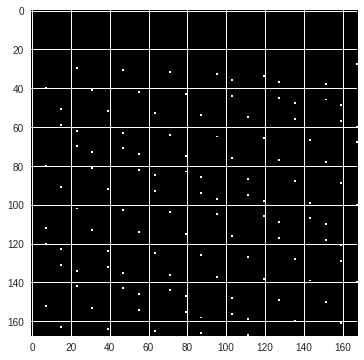

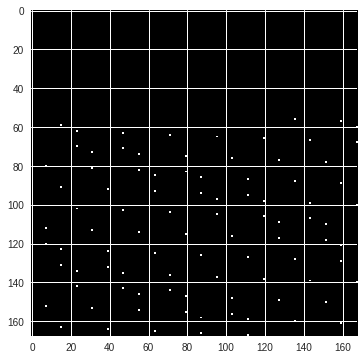

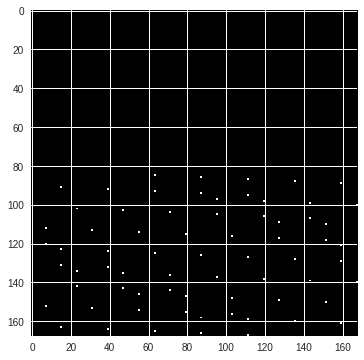

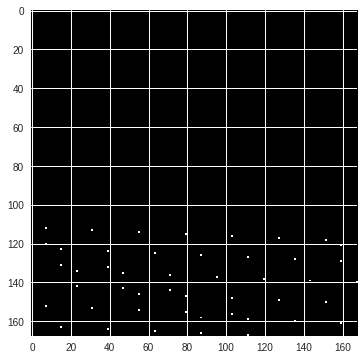

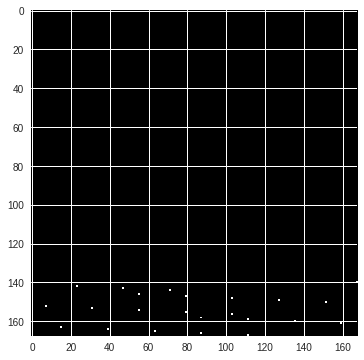

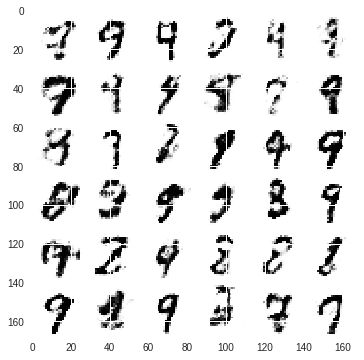

In [12]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for step in range(1, num_steps+1):
    batch_x, _ = df.train.next_batch(batch_size)
    noise_temp = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
    feed_dict = {disc_inp:batch_x, gen_inp:noise_temp}
    _, _, gl, dl = sess.run([training_gen, training_disc, cost_gen, cost_disc], feed_dict=feed_dict)
    if step % 2000 == 0 or step == 1:
      print('Step %i Generator loss %f, Discriminator loss %f' %(step, gl, dl))
  print('fininshed')
  n = 6
  canvas = np.empty((28*n, 28*n))
  for i in range(n):
    z = np.random.uniform(-1., 1., size=[n, noise_dim])
    g = sess.run(gen_out, feed_dict={gen_inp:z})
    g = -1*(g-1)
    for j in range(n):
      canvas[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])
    plt.figure(figsize=(n,n))
    plt.imshow(canvas, origin="upper", cmap="gray")
    plt.show()